In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('regression_train_data.csv')

df.tail()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric
1650,BTC,1631491200,255970,22694,39.221105,46821.84,43511.30,46049.72,44958.56,1.909473e+09,4851.21,1.003943e+07,5.868188e+06,21683.142857,5673.818571,1.801580e+09,0.333333
1651,BTC,1631577600,268127,21508,41.961191,47263.56,44776.37,44958.56,47129.01,1.237184e+09,8554.46,1.125093e+07,6.930093e+06,21192.000000,5333.497143,1.398910e+09,-1.000000
1652,BTC,1631664000,268957,24119,14.767874,48457.30,46725.15,47129.01,48148.45,1.282943e+09,7904.85,3.971923e+06,7.023240e+06,21020.714286,5720.110000,1.281446e+09,-0.666667
1653,BTC,1631750400,271223,23153,16.009002,48498.51,47050.55,48148.45,47764.47,1.229076e+09,3872.70,4.342010e+06,7.094340e+06,20876.571429,5599.984286,1.242776e+09,1.000000
1654,BTC,1631836800,271040,22644,12.869401,48172.36,46770.31,47764.47,47297.98,8.992421e+08,4700.76,3.488122e+06,6.165475e+06,20935.714286,5410.792857,1.138200e+09,-0.500000


In [3]:
pre_1_day_list = []

for i in range(1, len(df)):
    open = df.iloc[i-1,7]
    pre_1_day_list.append(open)

In [4]:
pre_7_day_list = []

for i in range(6, len(df)):
    open = df.iloc[i-6,7]
    pre_7_day_list.append(open)

In [5]:
df = df.iloc[1:,]

df['pre_1_day_open'] = pre_1_day_list

df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open
1,BTC,1459728000,208929,1444,10.204954,420.39,416.21,419.06,419.33,14031939.65,0.0,2.132111e+06,NaN,NaN,NaN,NaN,0.000000,418.51
2,BTC,1459814400,216176,1558,10.444011,423.67,417.95,419.33,422.07,17260368.39,0.0,2.257745e+06,NaN,NaN,NaN,NaN,-0.500000,419.06
3,BTC,1460073600,214191,2144,12.736554,423.51,415.50,420.14,417.69,19810838.26,0.0,2.728055e+06,2.225069e+06,1810.142857,0.0,1.469556e+07,0.000000,419.33
4,BTC,1460160000,196441,2459,11.448744,418.85,412.39,417.69,418.05,12291880.83,0.0,2.249003e+06,2.295103e+06,1911.142857,0.0,1.457478e+07,-0.333333,420.14
5,BTC,1460332800,230040,1879,11.177354,422.35,418.11,420.25,421.43,15374195.04,0.0,2.571238e+06,2.421183e+06,2009.714286,0.0,1.479727e+07,0.000000,417.69


In [6]:
df = df.iloc[5:,]

df['pre_7_day_open'] = pre_7_day_list

df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open
6,BTC,1460419200,240206,3297,14.552426,426.69,420.70,421.43,424.74,24580503.64,0.0,3.495580e+06,2.598016e+06,2258.142857,0.0,1.584300e+07,-0.5,420.25,418.51
7,BTC,1460505600,223506,3409,14.401458,426.58,421.41,424.74,423.47,16183793.93,0.0,3.218812e+06,2.715363e+06,2480.285714,0.0,1.617829e+07,0.0,421.43,419.06
8,BTC,1460592000,227928,2610,13.007788,425.44,421.84,423.47,424.02,13038970.54,0.0,2.964839e+06,2.747512e+06,2494.000000,0.0,1.586950e+07,0.0,424.74,419.33
9,BTC,1460678400,212178,4803,18.014204,429.49,423.25,424.02,428.67,23214560.10,0.0,3.822218e+06,2.903821e+06,2873.857143,0.0,1.635575e+07,-0.5,423.47,420.14
10,BTC,1460764800,182004,2653,16.767064,432.00,426.84,428.67,430.05,12517265.78,0.0,3.051673e+06,3.018488e+06,2901.571429,0.0,1.638795e+07,1.0,424.02,417.69


In [7]:
df = df.dropna()

In [8]:
df = df[df['7_day_reddit_comments_per_day'] > 0]

In [9]:
df.tail(15)

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open
1640,BTC,1630627200,283991,23891,10.631846,51056.15,48362.56,49280.77,50019.51,1.926046e+09,5893.59,3.019348e+06,3.766715e+06,20759.714286,5027.012857,1.346399e+09,1.000000,46993.31,47690.54
1641,BTC,1630713600,227732,17405,12.226868,50549.35,49501.12,50019.51,49935.29,8.398889e+08,5673.01,2.784449e+06,3.664775e+06,20953.000000,5030.192857,1.376876e+09,0.000000,49280.77,46852.22
1642,BTC,1630800000,205066,16605,10.596643,51890.18,49499.28,49935.29,51784.16,1.084417e+09,8007.41,2.173011e+06,3.453842e+06,21138.000000,5657.671429,1.399703e+09,-1.000000,50019.51,49088.10
1643,BTC,1630886400,268877,22822,13.248070,52766.16,51035.68,51784.16,52693.32,1.328373e+09,8189.57,3.562101e+06,3.388924e+06,21239.142857,6017.180000,1.390525e+09,0.250000,49935.29,48918.90
1644,BTC,1630972800,276624,24946,13.800644,52919.24,43904.42,52693.32,46856.31,4.055874e+09,10936.71,3.817589e+06,3.383061e+06,21695.571429,6837.808571,1.767336e+09,0.800000,51784.16,48794.26
1645,BTC,1631059200,270483,25318,12.273956,47362.35,44475.76,46856.31,46073.45,2.105187e+09,5198.56,3.319896e+06,3.267135e+06,21919.428571,6987.622857,1.850797e+09,-0.500000,52693.32,46993.31
1646,BTC,1631145600,274384,24162,14.010704,47335.29,45572.30,46073.45,46392.85,1.499767e+09,4713.58,3.844313e+06,3.217244e+06,22164.142857,6944.632857,1.834222e+09,-1.000000,46856.31,49280.77
1647,BTC,1631232000,261371,22230,38.222201,47026.67,44198.27,46392.85,44853.10,1.631277e+09,6025.10,9.990175e+06,4.213076e+06,21926.857143,6963.420000,1.792112e+09,-1.000000,46073.45,50019.51
1648,BTC,1631318400,218445,16794,25.543474,45987.63,44741.98,44853.10,45166.12,6.622981e+08,4149.86,5.579844e+06,4.612419e+06,21839.571429,6745.827143,1.766742e+09,0.666667,46392.85,49935.29
1649,BTC,1631404800,192691,15638,23.281165,46403.50,44765.82,45166.12,46049.72,7.471813e+08,3841.71,4.486071e+06,4.942856e+06,21701.428571,6150.727143,1.718565e+09,1.000000,44853.10,51784.16


In [10]:
post_1_day_list = []

for i in range(0, len(df)-1):
    close = df.iloc[i+1,8]
    post_1_day_list.append(close)

In [11]:
post_7_day_list = []

for i in range(0, len(df)-6):
    close = df.iloc[i+6,8]
    post_7_day_list.append(close)

In [12]:
df = df.iloc[:-1,]

df['post_1_day_close'] = post_1_day_list

df.tail()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open,post_1_day_close
1649,BTC,1631404800,192691,15638,23.281165,46403.50,44765.82,45166.12,46049.72,7.471813e+08,3841.71,4.486071e+06,4.942856e+06,21701.428571,6150.727143,1.718565e+09,1.000000,44853.10,51784.16,44958.56
1650,BTC,1631491200,255970,22694,39.221105,46821.84,43511.30,46049.72,44958.56,1.909473e+09,4851.21,1.003943e+07,5.868188e+06,21683.142857,5673.818571,1.801580e+09,0.333333,45166.12,52693.32,47129.01
1651,BTC,1631577600,268127,21508,41.961191,47263.56,44776.37,44958.56,47129.01,1.237184e+09,8554.46,1.125093e+07,6.930093e+06,21192.000000,5333.497143,1.398910e+09,-1.000000,46049.72,46856.31,48148.45
1652,BTC,1631664000,268957,24119,14.767874,48457.30,46725.15,47129.01,48148.45,1.282943e+09,7904.85,3.971923e+06,7.023240e+06,21020.714286,5720.110000,1.281446e+09,-0.666667,44958.56,46073.45,47764.47
1653,BTC,1631750400,271223,23153,16.009002,48498.51,47050.55,48148.45,47764.47,1.229076e+09,3872.70,4.342010e+06,7.094340e+06,20876.571429,5599.984286,1.242776e+09,1.000000,47129.01,46392.85,47297.98


In [13]:
df = df.iloc[:-5,]

df['post_7_day_close'] = post_7_day_list

df.tail()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,...,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open,post_1_day_close,post_7_day_close
1644,BTC,1630972800,276624,24946,13.800644,52919.24,43904.42,52693.32,46856.31,4.055874e+09,...,3.817589e+06,3.383061e+06,21695.571429,6837.808571,1.767336e+09,0.800000,51784.16,48794.26,46073.45,44958.56
1645,BTC,1631059200,270483,25318,12.273956,47362.35,44475.76,46856.31,46073.45,2.105187e+09,...,3.319896e+06,3.267135e+06,21919.428571,6987.622857,1.850797e+09,-0.500000,52693.32,46993.31,46392.85,47129.01
1646,BTC,1631145600,274384,24162,14.010704,47335.29,45572.30,46073.45,46392.85,1.499767e+09,...,3.844313e+06,3.217244e+06,22164.142857,6944.632857,1.834222e+09,-1.000000,46856.31,49280.77,44853.10,48148.45
1647,BTC,1631232000,261371,22230,38.222201,47026.67,44198.27,46392.85,44853.10,1.631277e+09,...,9.990175e+06,4.213076e+06,21926.857143,6963.420000,1.792112e+09,-1.000000,46073.45,50019.51,45166.12,47764.47
1648,BTC,1631318400,218445,16794,25.543474,45987.63,44741.98,44853.10,45166.12,6.622981e+08,...,5.579844e+06,4.612419e+06,21839.571429,6745.827143,1.766742e+09,0.666667,46392.85,49935.29,46049.72,47297.98


In [14]:
df = df[df['time'] >= 1546300800]

In [15]:
df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,...,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open,post_1_day_close,post_7_day_close
773,BTC,1546300800,234725,3844,2.342173,3938.75,3696.94,3747.39,3880.15,1.705983e+08,...,549766.653485,982187.714417,5343.571429,2618.110000,2.437875e+08,0.000000,3896.21,3834.73,3961.01,4040.75
774,BTC,1546387200,271696,6423,3.628013,3989.59,3826.29,3880.15,3961.01,2.108546e+08,...,985716.743373,963164.350258,5447.428571,2793.571429,2.362753e+08,0.000000,3747.39,3848.78,3835.86,4048.34
775,BTC,1546473600,291016,5360,3.231430,3965.52,3778.76,3961.01,3835.86,1.764881e+08,...,940397.964094,917673.297528,5283.571429,2480.514286,2.178123e+08,0.666667,3880.15,3646.09,3874.06,3668.15
776,BTC,1546560000,281772,5601,3.451215,3901.65,3783.88,3835.86,3874.06,1.705076e+08,...,972455.822880,876079.584163,5232.142857,2540.960000,1.916413e+08,0.333333,3961.01,3947.86,4102.85,3669.20
777,BTC,1546732800,258522,3832,2.673424,4145.16,3829.09,3855.39,4102.85,2.362980e+08,...,691139.036976,821890.830073,5035.428571,2669.200000,1.871965e+08,-1.000000,3835.86,3797.06,4050.40,3664.38


In [17]:
# df.to_csv('regression_train_data_final.csv', index=False)

In [18]:
X = df[["close"
        ,"pre_7_day_open"
        ,"pre_1_day_open"
        ,"7_day_total_avg_transaction_value"
        ,"7_day_large_transaction_count"
        ,"7_day_reddit_comments_per_day"
        ,"7_day_volumeto"
        ,"sentiment_numeric"
       ]]

y = df["post_7_day_close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(876, 8) (876, 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train = X_scaler.transform(X_train)
# X_test = X_scaler.transform(X_test)
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

In [21]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)

# from sklearn.linear_model import Lasso
# model = Lasso(alpha=.01).fit(X_train, y_train)

# from sklearn.linear_model import Ridge
# model = Ridge(alpha=.01).fit(X_train, y_train)

# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=.01).fit(X_train, y_train)

# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(random_state=42, n_estimators=1000)
# model.fit(X_train, y_train.ravel())

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=250)
model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)
# predictions_unscaled = y_scaler.inverse_transform(predictions)


In [22]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions, squared=False)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1541.195443427582, R2: 0.9910294787879187


In [23]:
from joblib import dump, load

# dump(model, 'regression_7day.joblib') 

imported_model = load('regression_7day.joblib')
imported_predictions = imported_model.predict(X_test)

MSE = mean_squared_error(y_test, imported_predictions, squared=False)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 538.6826836567478, R2: 0.9910294787879187


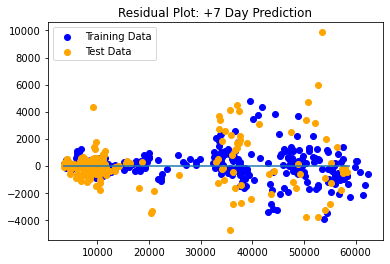

In [24]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test.ravel(), c="orange", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot: +7 Day Prediction");

In [25]:
X = df[["close"
        ,"pre_1_day_open"
        ,"pre_7_day_open"
        ,"7_day_total_avg_transaction_value"
        ,"7_day_large_transaction_count"
        ,"7_day_reddit_comments_per_day"
        ,"7_day_volumeto"
        ,"sentiment_numeric"
       ]]

y = df["post_1_day_close"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train = X_scaler.transform(X_train)
# X_test = X_scaler.transform(X_test)
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

model = RandomForestRegressor(random_state=42, n_estimators=250)
model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)
# predictions_unscaled = y_scaler.inverse_transform(predictions)

MSE = mean_squared_error(y_test, predictions, squared=False)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1232.158607955061, R2: 0.9942636125434519


In [26]:
# dump(model, 'regression_1day.joblib') 

imported_model = load('regression_1day.joblib')
imported_predictions = imported_model.predict(X_test)

MSE = mean_squared_error(y_test, imported_predictions, squared=False)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 622.2044792865975, R2: 0.9942636125434519


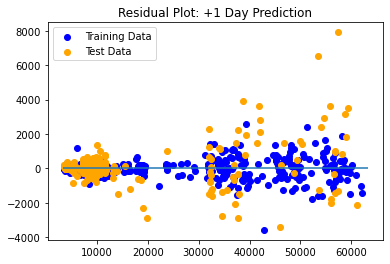

In [27]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test.ravel(), c="orange", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot: +1 Day Prediction");

In [30]:
# final +7-day prediction model

X = df[["close"
        ,"pre_7_day_open"
        ,"pre_1_day_open"
        ,"7_day_total_avg_transaction_value"
        ,"7_day_large_transaction_count"
        ,"7_day_reddit_comments_per_day"
        ,"7_day_volumeto"
        ,"sentiment_numeric"
       ]]

y = df["post_7_day_close"].values.reshape(-1, 1)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=250)
model.fit(X, y.ravel())
predictions_7day = model.predict(X)


# from joblib import dump
# dump(model, 'regression_7day.joblib')

In [31]:
# final +1-day prediction model

X = df[["close"
        ,"pre_7_day_open"
        ,"pre_1_day_open"
        ,"7_day_total_avg_transaction_value"
        ,"7_day_large_transaction_count"
        ,"7_day_reddit_comments_per_day"
        ,"7_day_volumeto"
        ,"sentiment_numeric"
       ]]

y = df["post_1_day_close"].values.reshape(-1, 1)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=250)
model.fit(X, y.ravel())
predictions_1day = model.predict(X)

# from joblib import dump
# dump(model, 'regression_1day.joblib')

In [34]:
df['prediction_post_1_day_close'] = predictions_1day
df['prediction_post_7_day_close'] = predictions_7day

df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,...,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,sentiment_numeric,pre_1_day_open,pre_7_day_open,post_1_day_close,post_7_day_close,prediction_post_1_day_close,prediction_post_7_day_close
773,BTC,1546300800,234725,3844,2.342173,3938.75,3696.94,3747.39,3880.15,1.705983e+08,...,5343.571429,2618.110000,2.437875e+08,0.000000,3896.21,3834.73,3961.01,4040.75,3927.45496,3960.56132
774,BTC,1546387200,271696,6423,3.628013,3989.59,3826.29,3880.15,3961.01,2.108546e+08,...,5447.428571,2793.571429,2.362753e+08,0.000000,3747.39,3848.78,3835.86,4048.34,3864.92616,3965.10020
775,BTC,1546473600,291016,5360,3.231430,3965.52,3778.76,3961.01,3835.86,1.764881e+08,...,5283.571429,2480.514286,2.178123e+08,0.666667,3880.15,3646.09,3874.06,3668.15,3884.09912,3678.24484
776,BTC,1546560000,281772,5601,3.451215,3901.65,3783.88,3835.86,3874.06,1.705076e+08,...,5232.142857,2540.960000,1.916413e+08,0.333333,3961.01,3947.86,4102.85,3669.20,4029.23608,3692.60248
777,BTC,1546732800,258522,3832,2.673424,4145.16,3829.09,3855.39,4102.85,2.362980e+08,...,5035.428571,2669.200000,1.871965e+08,-1.000000,3835.86,3797.06,4050.40,3664.38,4028.35836,3810.20844


In [35]:
df.to_csv('regression_data_with_predictions.csv', index=False)

In [44]:
test = [43827.65, 48148.45, 40709.59, 275235*18.270036761095465, 21914, 2927.82, 1807576533.35, .25]

test = np.asarray(test).reshape(1,-1)

In [49]:
# tested 11:45pm on 9/22/21
test_model = load('regression_1day.joblib')
test_prediction = test_model.predict(test)

test_prediction[0]

44929.86547999995

In [50]:
# tested 11:45pm on 9/22/21
test_model = load('regression_7day.joblib')
test_prediction = test_model.predict(test)

test_prediction[0]

46233.321119999964